In [1]:
# Standard useful data processing imports
import random
import numpy as np
import pandas as pd
# Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
# Scikit learn for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Keras Imports - CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [2]:
data=pd.read_csv("data.csv",low_memory=False)
data.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [3]:
#cols=np.arange(0,785).astype('<U5')
#pixel=np.array(['pixel_']*785)
#cols=np.char.add(pixel,cols)
#cols=np.append(cols,['character'])
#data.columns=cols
#data=data.drop(columns=['pixel_0'])

In [4]:
classes=data.groupby('character').count().index
new_class=list()
for i in range(len(classes)) :
    new_class.append(classes[i].split("_")[-1])
classes=new_class

## Creating a devnagri label list

In [7]:
hindi_label=pd.read_csv('labels.csv')
hindi_label.dropna()
hindi_label.loc[hindi_label.label=='bha'].devnagrilabel.to_string(index=False)

' भ'

In [8]:
list_classes=[]
for i in range(len(classes)):
    devnagri_char=hindi_label.loc[hindi_label.label==classes[i]].devnagrilabel.to_string(index=False)
    list_classes.append(devnagri_char)
list_classes

[' क',
 ' ख',
 ' ग',
 ' घ',
 ' ङ',
 ' च',
 ' छ',
 ' ज',
 ' झ',
 ' ञ',
 ' ट',
 ' ठ',
 ' ड',
 ' ढ',
 ' ण',
 ' त',
 ' थ',
 ' द',
 ' ध',
 ' न',
 ' प',
 ' फ',
 ' ब',
 ' भ',
 ' म',
 ' य',
 ' र',
 ' ल',
 ' व',
 ' श',
 ' ष',
 ' स',
 ' ह',
 ' क्ष',
 ' त्र',
 ' ज्ञ',
 ' ०',
 ' १',
 ' २',
 ' ३',
 ' ४',
 ' ५',
 ' ६',
 ' ७',
 ' ८',
 ' ९']

## Viewing the data

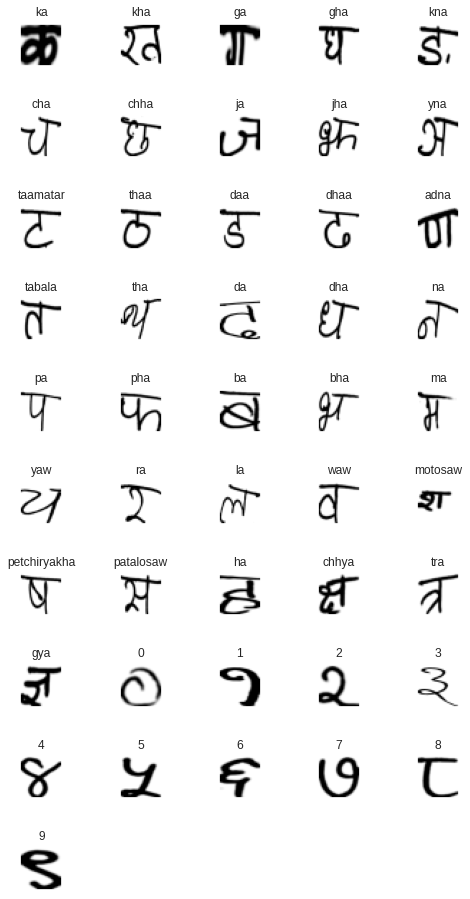

In [7]:
char_names = data.character.unique()  
rows =10;columns=5;
fig, ax = plt.subplots(rows,columns, figsize=(8,16))
for row in range(rows):
    for col in range(columns):
        ax[row,col].set_axis_off()
        if columns*row+col < len(char_names):
            x = data[data.character==char_names[columns*row+col]].iloc[0,:-1].values.reshape(32,32)
            x = x.astype("float64")
            x/=255
            ax[row,col].imshow(x, cmap="binary")
            ax[row,col].set_title(char_names[columns*row+col].split("_")[-1])

            
plt.subplots_adjust(wspace=1, hspace=1)   
plt.show()

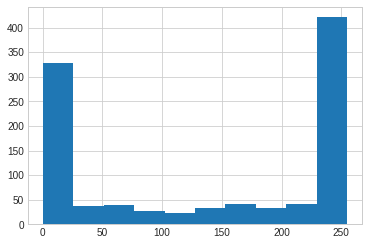

In [20]:
#Verifying the pixel distribution of any random character
import matplotlib.pyplot as plt
plt.hist(data.iloc[0,:-1])
plt.show()

### Let's normalize the pixel values and set the character column to target variable

In [21]:
X = data.values[:,:-1]/255.0

Y = data["character"].values


In [22]:
#Let us minimize the memory consumption
del data
n_classes = 46

Information from the visualization

Further preprocessing steps required

In [23]:
# Let's split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Encode the categories
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)


In [24]:
img_height_rows = 32
img_width_cols = 32

In [25]:
im_shape = (img_height_rows, img_width_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_height_rows,img_width_cols,1) 
x_test = x_test.reshape(x_test.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple

In [26]:
x_train=x_train.astype(np.float32)
x_test=x_test.astype(np.float32)


# CNN Model - Sequential Modelling


In [30]:
cnn = Sequential()

In [31]:
kernelSize = (3, 3)
ip_activation = 'relu'
ip_conv_0 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
cnn.add(ip_conv_0)

In [32]:
# Add the next Convolutional+Activation layer
ip_conv_0_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_0_1)

# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_0)

In [33]:
ip_conv_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1)
ip_conv_1_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1_1)

pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

In [34]:
# Let's deactivate around 20% of neurons randomly for training
drop_layer_0 = Dropout(0.2)
cnn.add(drop_layer_0)

In [35]:
flat_layer_0 = Flatten()
cnn.add(Flatten())


In [36]:
# Now add the Dense layers
h_dense_0 = Dense(units=128, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_0)
# Let's add one more before proceeding to the output layer
h_dense_1 = Dense(units=64, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_1)

In [37]:
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)


In [38]:
opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)


In [39]:
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)         

 After 10 epochs and batch size 28 our accuracy is 83.20%

In [40]:
history = cnn.fit(x_train, y_train,
                  batch_size=32, epochs=10,
                  validation_data=(x_test, y_test))

Epoch 1/10
2013/2013 [==============================] - 232s 115ms/step - loss: 0.8034 - accuracy: 0.7641 - val_loss: 0.3115 - val_accuracy: 0.9029
Epoch 2/10
2013/2013 [==============================] - 221s 110ms/step - loss: 0.2857 - accuracy: 0.9125 - val_loss: 0.2080 - val_accuracy: 0.9374
Epoch 3/10
2013/2013 [==============================] - 218s 108ms/step - loss: 0.2079 - accuracy: 0.9361 - val_loss: 0.1819 - val_accuracy: 0.9469
Epoch 4/10
2013/2013 [==============================] - 227s 113ms/step - loss: 0.1707 - accuracy: 0.9489 - val_loss: 0.1693 - val_accuracy: 0.9535
Epoch 5/10
2013/2013 [==============================] - 251s 125ms/step - loss: 0.1448 - accuracy: 0.9562 - val_loss: 0.1767 - val_accuracy: 0.9541
Epoch 6/10
2013/2013 [==============================] - 246s 122ms/step - loss: 0.1240 - accuracy: 0.9626 - val_loss: 0.1584 - val_accuracy: 0.9588
Epoch 7/10
2013/2013 [==============================] - 233s 116ms/step - loss: 0.1231 - accuracy: 0.9636 - val_

In [41]:
scores = cnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 97.03%


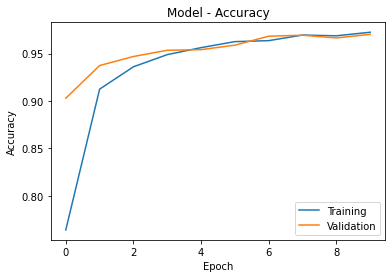

In [42]:
# Accuracy
print(history)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

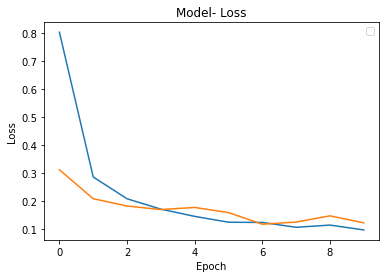

In [43]:
# Loss
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## Saving our model

Since our model will be used in the future we must save it for future use

In [44]:
# Lets save our model 

from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model


model_json = cnn.to_json()

with open("dcr.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
cnn.save_weights("dcr.h5")


## Checking if it is saved fine

In [1]:
from tensorflow.keras.models import model_from_json,load_model
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential

# load json and create model
with open('dcr.json','r') as json_file :
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("dcr.h5")
print("Loaded model from disk")

loaded_model.save('dcr.hdf5')
loaded_model=load_model('dcr.hdf5')


Loaded model from disk


Now lets check if our loaded model performs as it did on test set earlier on training.

NameError: name 'y_test' is not defined

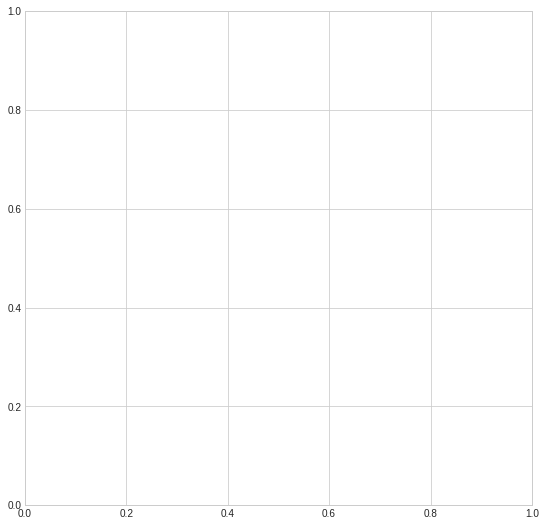

In [10]:
plt.style.use('seaborn-whitegrid')
r=2
c=2
fig = plt.figure(figsize=(20, 20))
for i in range(r*c):
    plt.subplot(r, c, i+1)
    lbl = np.argmax(y_test[i])
    img = x_test[i]
    img = img.reshape(1, 32, 32, 1)
    prediction = new_model.predict(img)
    prediction = np.argmax(prediction)
    title = f"Pred: {classes[prediction]} Real: {classes[lbl]}"
    plt.title(title)
    plt.imshow(img.reshape(img_height_rows, img_width_cols))
    
plt.show()



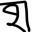

In [63]:
from PIL import Image, ImageOps
testing_image=Image.open('Testing_images/sh.png')
testing_image.resize((32,32))

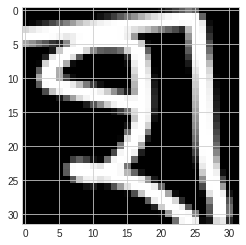

Predicted Label motosaw


In [56]:
def pred(testing_image):
    testing_image=ImageOps.grayscale(testing_image)
    img=np.array(testing_image)
    img=img.reshape(1,32,32,1)
    img=img/255.0
    img=1-img
    plt.imshow(testing_image)
    lab=classes[np.argmax(new_model.predict(img))]
    plt.show()
    return lab
print(f"Predicted Label {pred(testing_image)}")

In [36]:
#testing_image.show()

In [44]:
np.array(list_classes).shape

(58,)

In [54]:
new_model=load_model('dcr.hdf5')